# Project 5: 
# Expedia Hotel Recommendations
## Which hotel type will an Expedia customer book?

## Table of Contents:

### Part 1
1. [Background](#1.-Background)  
1. [Problem Statement](#2.-Problem-Statement)  
1. [Executive Summary](#3.-Executive-Summary)  
1. [Exploratory Data Analysis and Data Cleaning](#4.-Exploratory-Data-Analysis-and-Data-Cleaning)  
    1. [Data Dictionary](#a.-Data-Dictionary)  
    1. [Preliminary Data Cleaning](#b.-Preliminary-Data-Cleaning) 
    1. [Preliminary Exploratory Data Analysis](#c.-Preliminary-Exploratory-Data-Analysis) 
    1. [Feature Engineering](#d.-Feature-Engineering) 
    1. [More Exploratory Data Analysis](#e.-More-Exploratory-Data-Analysis) 
    1. [Final Data Cleaning and processing the whole dataset](#f.-Final-Data-Cleaning-and-processing-the-whole-dataset) 
    

### Part 2
5. [Final Dataset Preparation for Modelling](#5.-Final-Dataset-Preparation-for-Modelling)
1. [Modeling](#6.-Modeling)    
    1. [Preprocessing Functions](#a.-Preprocessing-Functions)
    1. [Base Case](#b.-Base-Case)
    1. [Categorical Naive Bayes](#c.-Categorical-Naive-Bayes)
    1. [Random Forrest Classifier Model](#d.-Random-Forrest-Classifier-Model)
    1. [K Nearest Neighbor](#e.-K-Nearest-Neighbor)
1. [TensorFlow Recommedation System](#7.-TensorFlow-Recommendation-System)
1. [Conclusion and Recommendations](#8.-Conclusion-and-Recommendations)  
1. [References and Data Sources](#9.-References-and-Data-Sources) 

### Appendix
1. [TensorFlow Recommedation System]()

## 1. Background

Expedia is a online travel hotel booking website. At this moment, they are using search parameters to adjust their hotel recommendations for each users. They would like to personalise their recommendations more for each user by employing AI.

## 2. Problem Statement

Using past data of each user, we are tasked to build a model that predicts the likelihood a user will stay at 100 different hotel groups i.e. a problem of classifying 100 different classes. Using this model, we hope to predict top 5 hotel groups that appeals more and is more likely to be booked by the user. 

The metric for evaluating our model is Mean Average Precision @ 5 meaning that we are going to make 5 predictions on which hotel group will be booked. If our first prediction is correct, we will be allocated 1 point, if we only get it right on the 2nd prediction, we will be allocated 0.8 points and so on. If we didn't predict the correct hotel group in all 5 predictions, the score is 0.

## 3. Executive Summary

Our objective in this project is to achieve a high MAP@5 score by prediction. The challenges that we experienced are firstly, we have to predict 100 different classes, this means that the probability of getting the correct prediction is small. Secondly, our features are all nominal categorical features. Some of the features have high cardinality. High Cardinality is a double edge sword for us, on one hand it provide variances to distinguish between the many hotel_cluster classes. We appreciate the variance especially in this case where we needed enough variance for distingushing between 100 different clasess. On the other, it messes around with the models whereby the model stalls when it is faced with new category that it have not seen before. We attempt to circumvent this issue by creating a new category, others, during training phrase to map all these unseen categories.

Although the features were represented by integars, as they were all nominal features, we cannot assume any linear relationship between the categories and the numbers representing them. We have to make sure our model is robust and give the same results even when we switch around the numbers representing the different categories. As there is no linear relationship, we did our EDA using Cramer's V with biased correction which gave us more meaningful results and return to us the association between the different features.

On the modeling, we tested various different models first using a small dataset which we filter out 10 classes and 100,000 data points from the main dataset. As expected, models which depends on linearity within the features are not doing well like, K-Nearest Neighbor or Logistic Regression. Due to high cardinality, Random Forest Classifier also didn't work too well as we had to do OneHotEncoding to the features to avoid RandomForestClassifier from treating them like continuous features. Also it is computationally expensive. The ML model that perform well is Categorical Naive Bayes which is still computationally inexpensive comparatively and it also managed our features relatively well. CategoricalNB obtained a MAP@5 score of 0.6036 on this smaller dataset. We also decided to try out the newest TensorFlow Recommendation System which was released in 2020 and use it for our prediction as doing a recommendation system was our main motivation in choosing this Kaggle Challenge. Our TFRS model achieve a MAP@5 score of 0.5695 on the testset.

We tried out the CategoricalNB model and the TensorFlow Recommendation System on the full dataset and achieve the Kaggle score of 0.2941 using the CategoricalNB model and 0.2194 on the TFRS model. Although the CategoricalNB model perform better than our TFRS model, it is because our CategoricalNB model have been tuned more finely than our TFRS model which still show signs of overfitting. Given more time, we could tune the TFRS model more finely and compare the results again.

That saying, we like the potential of our TFRS model. Despite us not yet having prevented it from overfitting, it already achieve a score close to our best model, the CategoricalNB model. Also there is ways that we can improve the model compared to the CategoricalNB Model.

We also like that the model can handle new categories with ease which is a challenge for all our other ML models including the CategoricalNB where we had to write a preprocessing step to categorical all new categories as 'others. Furthermore we can train this model by batches which will sort the issue of out of memory when training with huge datasets. This also means that we do not have to retrain the model when we have need data and we can keep improving the model when we have new data. In addition, the model is one of the models trained the fastest.

This model also have the flexibility to be reconfigured for different requirement. For example as mentioned earlier, our model is configured to recommend hotel cluster based on the user past preferences and searched destination. We can also reconfigure the model to recommend destinations and hotel cluster based on user past preferences by putting destination under the Candidate Model and using the destination dataset to find similarities between destinations.

In conclusion, we are satifised with the performance of our top 2 models especially the TFRS model which achieved a kaggle score of 0.2194 and beat the baseline score of 0.07. At the same time, the models can be further improved to achieve better scores which match the top scores in Kaggle.

Going forward, for the TFRS model, we can finetune the model to address overfitting using early stopping or regularization and also build a multitask TFRS model which include a ranking task to improve the prediction. For the CategoricalNB model, we can try balancing the different classes more by using an undersampling for some of the classes and undersampling for some of the classes within memory allowance and we can also explore using partial_fit in CategoricalNB to manage the memory usage. This will require the use of a custom pipeline.

## 4. Exploratory Data Analysis and Data Cleaning

### a. Data Dictionary

| Column name               | Description                                                                                                               | Data type |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------|-----------|
| date_time                 | Timestamp                                                                                                                 | string    |
| site_name                 | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)                                     | int       |
| posa_continent            | ID of continent associated with site_name                                                                                 | int       |
| user_location_country     | The ID of the country the customer is located                                                                             | int       |
| user_location_region      | The ID of the region the customer is located                                                                              | int       |
| user_location_city        | The ID of the city the customer is located                                                                                | int       |
| orig_destination_distance | Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated | double    |
| user_id                   | ID of user                                                                                                                | int       |
| is_mobile                 | 1 when a user connected from a mobile device, 0 otherwise                                                                 | tinyint   |
| is_package                | 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise                    | int       |
| channel                   | ID of a marketing channel                                                                                                 | int       |
| srch_ci                   | Checkin date                                                                                                              | string    |
| srch_co                   | Checkout date                                                                                                             | string    |
| srch_adults_cnt           | The number of adults specified in the hotel room                                                                          | int       |
| srch_children_cnt         | The number of (extra occupancy) children specified in the hotel room                                                      | int       |
| srch_rm_cnt               | The number of hotel rooms specified in the search                                                                         | int       |
| srch_destination_id       | ID of the destination where the hotel search was performed                                                                | int       |
| srch_destination_type_id  | Type of destination                                                                                                       | int       |
| hotel_continent           | Hotel continent                                                                                                           | int       |
| hotel_country             | Hotel country                                                                                                             | int       |
| hotel_market              | Hotel market                                                                                                              | int       |
| is_booking                | 1 if a booking, 0 if a click                                                                                              | tinyint   |
| cnt                       | Numer of similar events in the context of the same user session                                                           | bigint    |
| hotel_cluster             | ID of a hotel cluster                                                                                                     | int       |

https://www.kaggle.com/c/expedia-hotel-recommendations/data

### b. Preliminary Data Cleaning

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error
import ml_metrics as metrics

from datetime import timedelta

In [2]:
# since the data is more than 3 GB, we shall do data cleaning iteratively using chucksize of 50000

# training set
df = pd.read_csv('../datasets/train.csv', nrows = 300000)
# kaggle test set
test = pd.read_csv('../datasets/test.csv', nrows = 300000)

In [3]:
df.head() #brief look at the dataset

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test.head() #brief look at the test dataset

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [5]:
df.shape #amount of data and features in the dataset

(300000, 24)

In [6]:
test.shape #amount of data and features in the test dataset

(300000, 22)

In [7]:
df.isnull().sum() #check for missing values

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    107843
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                         297
srch_co                         297
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [8]:
test.isnull().sum() #check for missing values

id                               0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    98360
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                          3
srch_co                          3
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
dtype: int64

In [9]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [10]:
test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

Train.csv have 2 more columns 'is_booking' and 'hotel_cluster' compared to Test.csv. Since we are predicting which hotel cluster a customer will book, only those data that make the booking would be relevant and hotel_cluster would be our target variable. The rest of the data where the user did not make a booking would be just noise. The rest of the structure and dtypes of Train.csv and Test.csv are the same.

In [11]:
#since our aim is predicting the hotel cluster the books are made for. 
#We look at the part of the dataset where booking is made.

bookings = df[df['is_booking'] == 1].drop('is_booking', axis = 1)

In [12]:
bookings.shape

(25094, 23)

In [13]:
bookings.isnull().sum()

date_time                       0
site_name                       0
posa_continent                  0
user_location_country           0
user_location_region            0
user_location_city              0
orig_destination_distance    8421
user_id                         0
is_mobile                       0
is_package                      0
channel                         0
srch_ci                         0
srch_co                         0
srch_adults_cnt                 0
srch_children_cnt               0
srch_rm_cnt                     0
srch_destination_id             0
srch_destination_type_id        0
cnt                             0
hotel_continent                 0
hotel_country                   0
hotel_market                    0
hotel_cluster                   0
dtype: int64

In [14]:
bookings.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

Notice that date_time, srch_ci, srch_co are objects, we will change this to datetime type and create 2 features - length of stay and dates to checkin

In [15]:
# changing type to datetime
bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d')
bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d')

In [16]:
# check for bookings later than the check in dates
bookings[bookings['srch_ci'] < bookings['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
88347,2014-06-07,2014-06-06,2014-06-07
206593,2014-09-02,2014-09-01,2014-09-04


In [17]:
# check for check in dates later than the check out dates
bookings[bookings['srch_co'] < bookings['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [18]:
# check for bookings later than the check in dates on the testset
test[test['srch_ci'] < test['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
3,2015-09-14 14:49:10,2015-09-14,2015-09-16
20,2015-09-01 06:09:06,2015-09-01,2015-09-03
31,2015-10-18 22:00:24,2015-10-18,2015-10-20
48,2015-10-12 15:12:49,2015-10-12,2015-10-14
50,2015-09-11 18:52:25,2015-09-11,2015-09-13
...,...,...,...
299899,2015-11-04 19:32:03,2015-11-04,2015-11-07
299978,2015-01-12 21:22:53,2015-01-12,2015-01-14
299980,2015-05-28 07:23:01,2015-05-28,2015-05-29
299987,2015-07-16 13:22:12,2015-07-16,2015-07-17


In [19]:
# check for check in dates later than the check out dates on the testset
test[test['srch_co'] < test['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
554,2015-09-22 19:39:21,2016-01-02,2015-12-25
1240,2015-06-23 21:00:15,2015-07-02,2015-07-01
2053,2015-11-23 18:44:40,2016-01-30,2016-01-18
2361,2015-07-08 22:43:56,2015-07-21,2015-07-18
2984,2015-06-28 21:44:22,2015-11-24,2015-11-21
...,...,...,...
297264,2015-09-30 00:40:45,2015-12-06,2015-11-11
298872,2015-10-20 13:50:45,2015-11-29,2015-11-16
299476,2015-09-08 20:22:20,2015-10-16,2015-10-04
299566,2015-10-30 12:20:03,2016-11-08,2016-08-13


For both sets, we notice that there are a couple of dates that 'srch_ci' that are earlier than the 'date_time' but only by 1 day. It is probably because the user book the hotel just after midnight of because of time difference. We will adjust this by setting the 'date_time' to be on the same date as the 'srch_ci'  

We also notice that there are 'srch_co' that are earlier than the 'srch_ci'. This could be possible because the dates are inversed. We will switch back the dates.

In [20]:
# for those bookings that the 'date_time' is later than the 'srch_ci' timing, 
# we change the 'date_time' to 'srch_ci' timing as explained in the text cell above

bookings['date_time'] = np.where(bookings['srch_ci'] < bookings['date_time'],
                                 bookings['srch_ci'],
                                 bookings['date_time'])

test['date_time'] = np.where(test['srch_ci'] < test['date_time'],
                                 test['srch_ci'],
                                 test['date_time'])

In [21]:
#verifing the change take place
bookings[bookings['srch_ci'] < bookings['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [22]:
test[test['srch_ci'] < test['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [23]:
# for those bookings that the 'srch_ci' is later than the 'srch_out' timing, 
# we reverse them as explained in the text cell above

bookings['srch_ci'], bookings['srch_co'] = np.where(bookings['srch_co'] < bookings['srch_ci'],
                                                    (bookings['srch_co'], bookings['srch_ci']),
                                                    (bookings['srch_ci'], bookings['srch_co'])
                                                   )

test['srch_ci'], test['srch_co'] = np.where(test['srch_co'] < test['srch_ci'],
                                                    (test['srch_co'], test['srch_ci']),
                                                    (test['srch_ci'], test['srch_co'])
                                                   )

In [24]:
bookings[bookings['srch_co'] < bookings['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [25]:
test[test['srch_co'] < test['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


### c. Preliminary Exploratory Data Analysis

In [26]:
for x in bookings.columns:
    print(f'{x}: {bookings[x].nunique()}')

date_time: 724
site_name: 40
posa_continent: 5
user_location_country: 135
user_location_region: 554
user_location_city: 4070
orig_destination_distance: 14927
user_id: 6683
is_mobile: 2
is_package: 2
channel: 11
srch_ci: 980
srch_co: 981
srch_adults_cnt: 10
srch_children_cnt: 10
srch_rm_cnt: 9
srch_destination_id: 5031
srch_destination_type_id: 7
cnt: 5
hotel_continent: 6
hotel_country: 156
hotel_market: 1536
hotel_cluster: 100


Also notice that hotel_market has much more categories than hotel_country which in turn have more categories than hotel_continent. It is highly likely that hotel_market is a subset of hotel_country which is in turn a subset of hotel_continent. As such, only hotel_market is needed.  

Similary for user_location_city, user_location_region and user_location_country, only user_location_city is needed.

In [27]:
groupby_cluster = bookings.groupby('hotel_cluster').nunique()
groupby_cluster

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market
hotel_cluster,,,,,,,,,,,,,,,,,,,,,
0,130,11,5,15,50,114,98,130,2,2,...,125,6,3,3,55,6,2,3,6,29
1,231,11,4,17,71,202,204,235,2,2,...,246,8,5,5,9,5,2,1,1,3
2,298,24,5,41,136,290,216,311,2,2,...,296,7,4,5,218,6,2,6,41,141
3,88,15,4,24,57,90,53,87,2,2,...,93,5,4,3,82,5,1,5,32,74
4,230,15,4,26,84,221,201,255,2,2,...,235,7,3,3,147,5,2,6,14,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,333,19,5,29,100,328,348,379,2,2,...,350,7,5,7,157,6,3,5,14,62
96,117,7,3,11,43,107,106,117,2,2,...,116,5,4,3,77,5,2,4,11,49
97,194,15,4,35,102,178,129,192,2,2,...,200,5,5,3,102,6,2,6,31,67


Notice that under hotel cluster, there is still many categories under different countries and continents meaning that the hotel clusters are not group by locations. Notice that the number of categorys under hotel market shrinks when group by hotel cluster. This implies that hotel market might influence hotel cluster.

In [28]:
groupby_country = bookings.groupby('hotel_country').nunique()
groupby_country.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_market,hotel_cluster
hotel_country,,,,,,,,,,,,,,,,,,,,,
0,48,8,2,13,26,32,24,25,2,2,...,51,5,5,3,13,5,1,1,3,16
1,11,4,2,10,10,10,2,8,2,2,...,12,2,2,1,5,3,1,1,1,8
2,5,2,2,4,5,5,1,3,1,1,...,5,1,2,1,1,1,1,1,1,4
3,4,3,3,3,3,3,0,3,1,1,...,5,2,1,1,3,1,1,1,3,4
4,10,6,2,5,8,10,7,10,1,2,...,10,3,2,1,2,2,1,1,1,4


In [29]:
groupby_country[groupby_country['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_market,hotel_cluster
hotel_country,,,,,,,,,,,,,,,,,,,,,


This confirm that hotel_country is a subset of hotel_continent

In [30]:
groupby_market = bookings.groupby('hotel_market').nunique()
groupby_market.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,
1,3,3,2,2,3,3,0,3,1,1,...,4,1,1,1,4,3,1,1,1,4
2,130,16,5,23,74,119,70,122,2,2,...,127,5,4,2,10,5,2,1,1,45
3,5,4,2,4,5,5,2,5,1,2,...,5,3,2,1,2,2,1,1,1,5
4,104,12,4,22,62,86,51,86,2,2,...,103,6,3,3,11,5,1,1,1,22
5,41,10,4,17,38,41,18,35,2,2,...,41,5,3,3,4,4,1,1,1,14


In [31]:
groupby_market[groupby_market['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,


In [32]:
groupby_market[groupby_market['hotel_country'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,
803,28,4,3,8,14,14,4,9,1,1,...,28,4,2,2,15,6,2,1,8,9
1463,25,5,2,8,21,22,15,22,2,2,...,28,2,3,1,5,4,1,1,2,17
1774,5,5,3,4,5,5,2,5,2,1,...,5,3,2,1,4,3,1,1,2,5


Hotel market is a subset of hotel_continent and have a big overlap with hotel_country.

In [33]:
groupby_destination_id = bookings.groupby('srch_destination_id').nunique()
groupby_destination_id.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
8,5,1,1,1,4,5,4,5,1,1,...,5,2,2,1,1,1,1,1,1,5
11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
14,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
19,2,1,1,1,1,1,0,1,1,1,...,3,1,1,1,1,1,1,1,1,1


In [34]:
groupby_destination_id[groupby_destination_id['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,


In [35]:
groupby_destination_id[groupby_destination_id['hotel_country'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
8799,19,4,2,7,16,17,11,18,2,2,...,20,2,3,1,1,1,1,2,1,15
11634,9,1,1,1,6,8,7,8,1,2,...,9,2,1,1,1,1,1,2,2,4
11850,24,4,2,5,14,20,20,19,2,1,...,27,6,3,2,1,1,1,2,4,14
20895,2,2,2,2,2,2,0,2,1,1,...,2,2,1,1,1,1,1,2,1,2
22074,3,3,2,3,3,3,2,3,1,1,...,3,2,1,1,1,1,1,2,1,3


In [36]:
groupby_destination_id[groupby_destination_id['srch_destination_type_id'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,


Looks like srch_destination_id is a subset of hotel_continent, srch_destination_type_id and have a huge overlap with hotel_country. Have overlap with hotel_market and hotel_cluster but not subset.

In [37]:
groupby_user_id = bookings.groupby('user_id').nunique()
groupby_user_id.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_id,,,,,,,,,,,,,,,,,,,,,
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
756,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1048,2,1,1,1,2,2,0,1,2,1,...,1,1,1,2,1,1,2,2,2,2
1482,1,1,1,1,1,1,1,1,1,1,...,2,1,2,1,1,1,1,1,1,1
1713,2,1,1,1,1,2,2,1,1,2,...,2,1,2,2,2,1,1,1,1,2


In [38]:
groupby_user_location_city = bookings.groupby('user_location_city').nunique()
groupby_user_location_city[groupby_user_location_city['user_location_country'] != 1].head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_location_city,,,,,,,,,,,,,,,,,,,,,
431,14,2,2,2,6,11,8,1,2,5,...,3,3,2,13,5,1,3,5,12,14
478,5,2,2,2,2,5,4,1,2,1,...,2,1,1,5,3,1,3,3,5,5
538,7,2,2,2,5,3,5,2,2,3,...,3,2,2,7,5,1,2,4,7,6
1361,7,3,3,3,3,3,7,1,1,3,...,3,2,1,7,5,1,4,5,6,8
1871,2,2,2,2,2,0,2,1,1,1,...,2,2,1,2,2,1,2,2,2,2


In [39]:
groupby_user_location_city = bookings.groupby('user_location_city').nunique()
groupby_user_location_city[groupby_user_location_city['user_location_region'] != 1].head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_location_city,,,,,,,,,,,,,,,,,,,,,
76,81,2,2,1,3,94,50,2,2,7,...,4,3,3,86,5,1,5,19,65,61
120,5,1,1,1,2,5,3,1,1,3,...,2,3,1,4,3,1,1,1,4,5
151,3,1,1,1,2,3,2,1,1,2,...,2,1,1,3,3,1,2,2,3,3
274,21,2,2,1,2,22,7,2,2,3,...,4,2,4,19,3,1,4,4,18,13
431,14,2,2,2,6,11,8,1,2,5,...,3,3,2,13,5,1,3,5,12,14


In [40]:
groupby_site_name = bookings.groupby('site_name').nunique()
groupby_site_name[groupby_site_name['posa_continent'] != 1]

,date_time,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
site_name,,,,,,,,,,,,,,,,,,,,,


'site_name' is a subset of 'posa_continent'. It is interesting to note that user_location_city is not a subset of user_location_country although there have quite a big overlap.

### d. Feature Engineering

In [41]:
# changing type to datetime
bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d')
bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d')

In [42]:
#creating length of stay and days to checkin
bookings['days_to_checkin'] = (bookings['srch_ci'] - bookings['date_time']).dt.days
bookings['stay_length'] = (bookings['srch_co'] - bookings['srch_ci']).dt.days

In [43]:
bookings['month_of_booking'] = bookings['date_time'].dt.month
bookings['month_of_staying'] = bookings['srch_ci'].dt.month

### e. More Exploratory Data Analysis

In [44]:
# To calculate crammer V between features and return it as a matrix

# code modified from https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix &
# https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
# referenced with https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
        

from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
    
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    phi2 = stat/obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(obs-1))    
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def crammer_v_matrix(df):
    
    rows= []
    for var1 in df:
        col = []
        for var2 in df:
            cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)
    
    cramers_results = np.array(rows)
    matrix = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns)
    
    return matrix

In [45]:
users = ['site_name', 'posa_continent', 'user_location_country',
         'user_location_region', 'user_location_city','user_id', 
         'is_mobile', 'is_package', 'channel', 'month_of_booking']

hotels = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 
          'srch_destination_id', 'srch_destination_type_id', 'cnt',
          'hotel_continent', 'hotel_country', 'hotel_market', 'days_to_checkin', 'stay_length','month_of_staying']

continuous = ['date_time','orig_destination_distance', 'srch_ci', 'srch_co']

target = ['hotel_cluster']

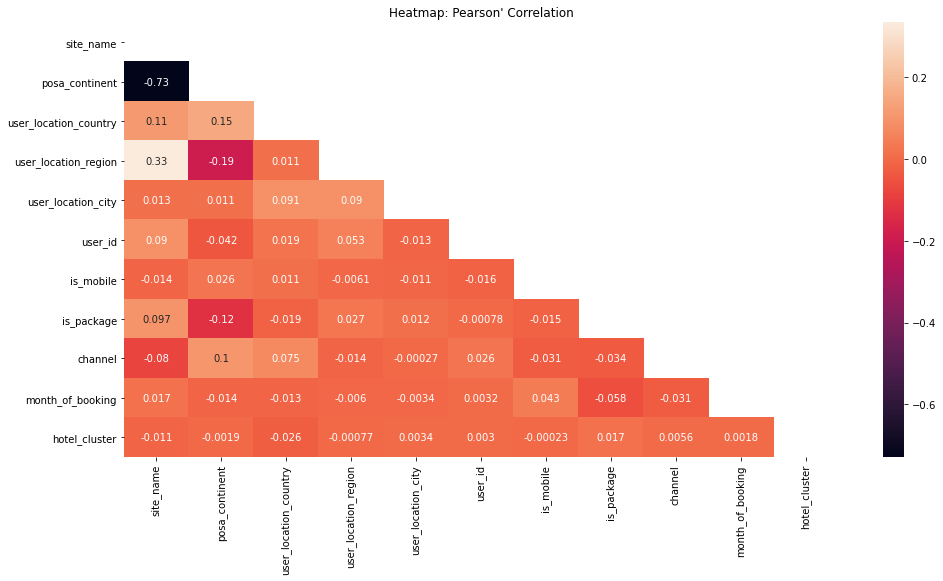

In [46]:
plt.figure(figsize = (16,8))
matrix = (bookings[users + target].corr())
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True)
plt.title("Heatmap: Pearson' Correlation");

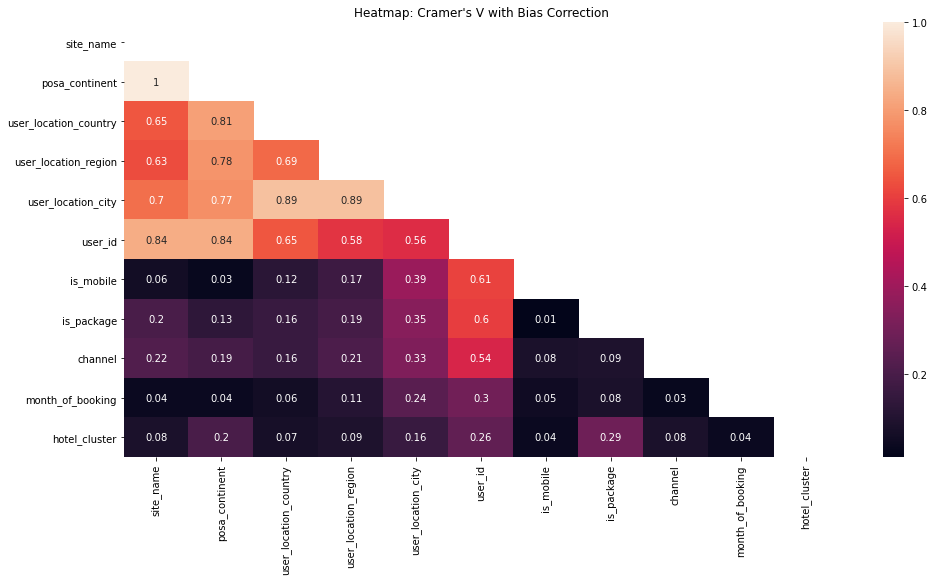

In [47]:
plt.figure(figsize = (16,8))
matrix = crammer_v_matrix(bookings[users + target])
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True)
plt.title("Heatmap: Cramer's V with Bias Correction");

Since all our features are nominal categorical in nature, it will be not suitable to find linear relationship between the features using Pearson Correlation. (Even though in this case pd.corr() can work as our categories are labeled by numbers but we shouldn't be treating the numbers as any linear relationship between them). As such, we decided to find association between features by Pearson's Chi-squared statistic models, in particular using Cramer's V with bias correction here.

'Site name', 'posa_continent' and 'user_id' have strong association. As such we will only remain 'user_id'.  
'user_location_country', 'user_location_region' and 'user_location_city' have strong association. We shall keep only 'user location city'

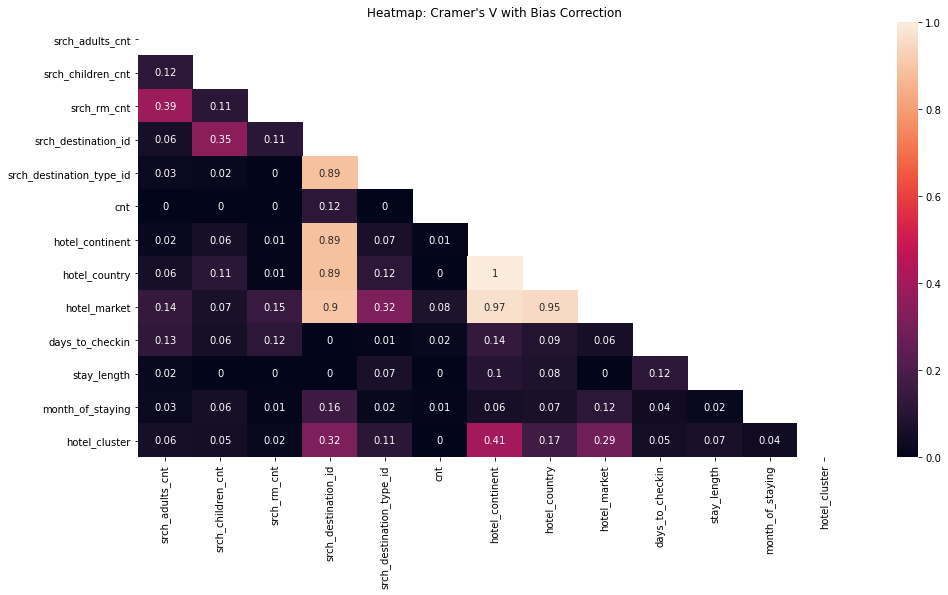

In [48]:
plt.figure(figsize = (16,8))
matrix = crammer_v_matrix(bookings[hotels + target])
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True)
plt.title("Heatmap: Cramer's V with Bias Correction");

Looking at the heatmap of the corrected Cramer V matrix, srch_destination_id have strong relationship with hotel_continent.  

As such we will only be keeping 'srch_adults_cnt', 'srch_children_cnt','srch_rm_cnt', 'srch_destination_id', 'cnt', 'hotel_market', 'days_to_checkin', 'stay_length','month_of_staying'

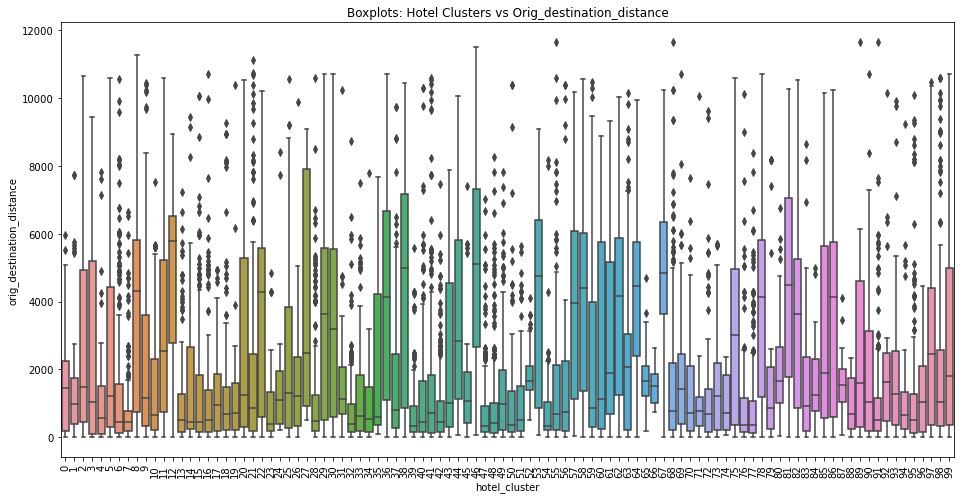

In [49]:
plt.figure(figsize = (16,8))
sns.boxplot(x='hotel_cluster', y = 'orig_destination_distance', data = bookings)
plt.xticks(rotation = 90);
plt.title('Boxplots: Hotel Clusters vs Orig_destination_distance');

As 'orig_destination_distance' have too many missing values and doesn't seem to have much variance for identifying 'hotel clusters', we shall drop it

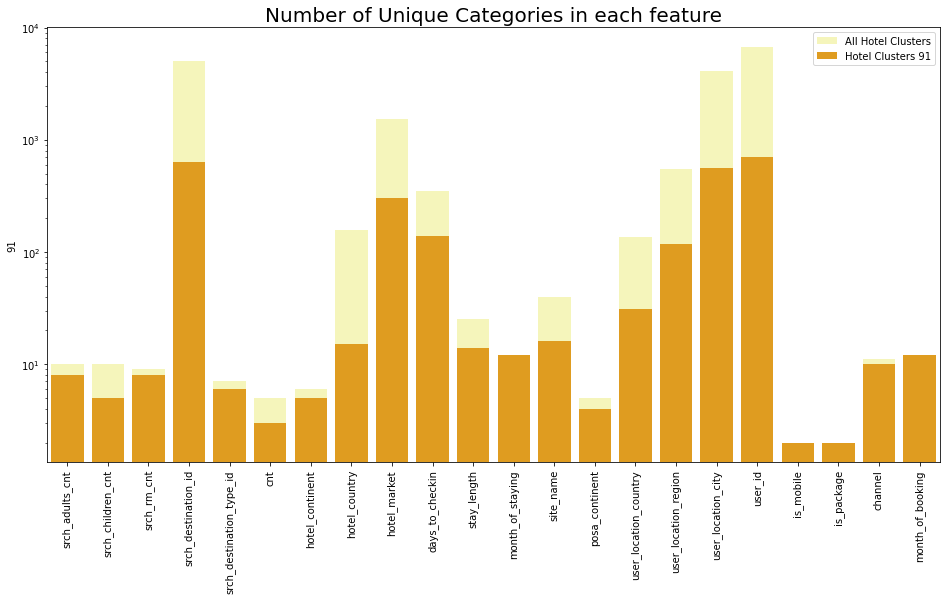

In [50]:
temp = hotels + users
groupby_cluster = bookings.groupby('hotel_cluster').nunique()
plt.figure(figsize = (16,8)),
sns.barplot(x=bookings[temp].columns, y=bookings[temp].nunique().values, color = 'yellow', alpha = 0.3, label = 'All Hotel Clusters')
plt.xticks(rotation = 90);
plt.yscale('log')
sns.barplot(x=groupby_cluster[temp].columns, y=groupby_cluster[temp].loc[91], color = 'orange', label = 'Hotel Clusters 91')
plt.title('Number of Unique Categories in each feature', fontsize = 20)
plt.legend();

This plot is just to have a feel of the number of unique values within all the hotel clusters vs the number of unique values in our most booked hotel cluster, hotel cluster 91. For those features that the unique values are much smaller in hotel cluster 91 than that is existing in all the hotel clusters, they would be the most useful to identify out hotel cluster 91.

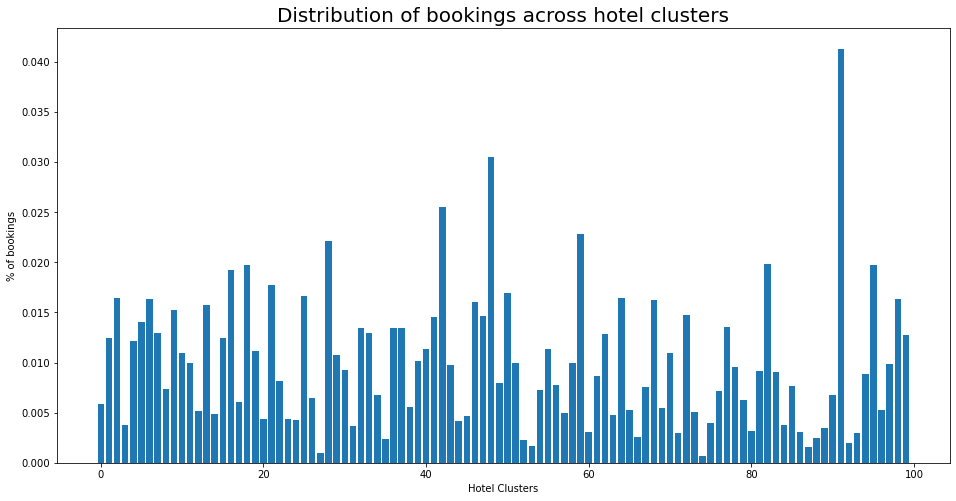

In [51]:
plt.figure(figsize = (16,8))
plt.bar(bookings['hotel_cluster'].value_counts(normalize = True).index, bookings['hotel_cluster'].value_counts(normalize = True).values);
plt.title('Distribution of bookings across hotel clusters', fontsize = 20)
plt.ylabel('% of bookings')
plt.xlabel('Hotel Clusters');

This plot is to look at the distribution between the different classes of hotel clusters. This show that it is not that even across the clusters and we might need to rebalance the classes in the model.

### f. Final Data Cleaning and processing the whole dataset

In [52]:
def final_clean(file, train = True):

    df_chunks = pd.read_csv(file, chunksize = 100000)

    chunk_list = []

    for chunk in df_chunks:
        
        #only taking the data with bookings
        if train:
            bookings = chunk[chunk['is_booking'] == 1].drop('is_booking', axis = 1)
        else:
            bookings = chunk

        # changing type to datetime
        bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
        bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d')
        bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d')
        
        #data cleaning for incorrectly input dates
        bookings['date_time'] = np.where(bookings['srch_ci'] < bookings['date_time'],
                                 bookings['srch_ci'],
                                 bookings['date_time'])

        bookings['srch_ci'], bookings['srch_co'] = np.where(bookings['srch_co'] < bookings['srch_ci'],
                                                            (bookings['srch_co'], bookings['srch_ci']),
                                                            (bookings['srch_ci'], bookings['srch_co'])
                                                           )
        
        #creating length of stay and days to checkin
        bookings['days_to_checkin'] = (bookings['srch_ci'] - bookings['date_time']).dt.days
        bookings['stay_length'] = (bookings['srch_co'] - bookings['srch_ci']).dt.days
        
        #creating length of stay and days to checkin
        bookings['month_of_booking'] = bookings['date_time'].dt.month
        bookings['month_of_staying'] = bookings['srch_ci'].dt.month

        col_to_drop = ['site_name','posa_continent',
                       'user_location_country','user_location_region',
                       'srch_destination_type_id',
                       'hotel_continent','hotel_country',
                       'orig_destination_distance', 'srch_ci', 'srch_co']
        
        bookings = bookings.drop(col_to_drop, axis = 1)
        
        chunk_list.append(bookings)

    return pd.concat(chunk_list)

In [53]:
df_concat = final_clean('../datasets/train.csv')
df_concat.head()

,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
1,2014-08-11,48862,12,0,1,9,2,0,1,8250,1,628,1,18,4,8,8
20,2014-02-27,52078,756,0,1,4,2,0,1,8291,1,191,2,50,2,2,4
27,2013-06-15,56440,1048,0,1,9,2,0,1,1385,1,185,58,83,8,6,9
72,2014-11-23,47725,1048,0,0,9,2,0,1,8803,1,69,36,215,2,11,6
79,2014-01-03,41898,1482,0,1,1,3,0,2,12009,1,680,95,50,5,1,2


In [54]:
df_concat.isnull().sum()

date_time              0
user_location_city     0
user_id                0
is_mobile              0
is_package             0
channel                0
srch_adults_cnt        0
srch_children_cnt      0
srch_rm_cnt            0
srch_destination_id    0
cnt                    0
hotel_market           0
hotel_cluster          0
days_to_checkin        0
stay_length            0
month_of_booking       0
month_of_staying       0
dtype: int64

In [55]:
df_concat.shape

(3000693, 17)

In [56]:
df_concat

,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
1,2014-08-11,48862,12,0,1,9,2,0,1,8250,1,628,1,18,4,8,8
20,2014-02-27,52078,756,0,1,4,2,0,1,8291,1,191,2,50,2,2,4
27,2013-06-15,56440,1048,0,1,9,2,0,1,1385,1,185,58,83,8,6,9
72,2014-11-23,47725,1048,0,0,9,2,0,1,8803,1,69,36,215,2,11,6
79,2014-01-03,41898,1482,0,1,1,3,0,2,12009,1,680,95,50,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37670275,2013-10-22,26232,1198182,0,0,0,1,0,1,24144,1,967,7,1,1,10,10
37670277,2013-10-30,24103,1198182,0,0,9,1,0,1,24144,1,967,42,0,1,10,10
37670281,2014-01-27,26232,1198182,0,1,0,1,0,1,8273,1,660,68,27,4,1,2
37670285,2014-07-15,26232,1198182,0,0,0,1,0,1,18811,1,592,77,12,1,7,7


In [57]:
# saving the cleanup data as csv file
df_concat.to_csv('../datasets/train_clean.csv', index = False)

In [58]:
test_concat = final_clean('../datasets/test.csv', train = False)

In [59]:
test_concat.isnull().sum()

id                      0
date_time               0
user_location_city      0
user_id                 0
is_mobile               0
is_package              0
channel                 0
srch_adults_cnt         0
srch_children_cnt       0
srch_rm_cnt             0
srch_destination_id     0
hotel_market            0
days_to_checkin        21
stay_length            21
month_of_booking        0
month_of_staying       21
dtype: int64

In [60]:
# filling the NA values
test_concat['days_to_checkin'].fillna(test_concat['days_to_checkin'].mode()[0], inplace=True)
test_concat['stay_length'].fillna(test_concat['stay_length'].mode()[0], inplace=True)
test_concat['month_of_staying'].fillna(test_concat['month_of_staying'].mode()[0], inplace=True)

In [61]:
test_concat.isnull().sum()

id                     0
date_time              0
user_location_city     0
user_id                0
is_mobile              0
is_package             0
channel                0
srch_adults_cnt        0
srch_children_cnt      0
srch_rm_cnt            0
srch_destination_id    0
hotel_market           0
days_to_checkin        0
stay_length            0
month_of_booking       0
month_of_staying       0
dtype: int64

In [62]:
test_concat.shape

(2528243, 16)

In [63]:
test_concat

,id,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_market,days_to_checkin,stay_length,month_of_booking,month_of_staying
0,0,2015-09-03,37449,1,1,0,3,2,0,1,12243,27,259.0,4.0,9,5.0
1,1,2015-09-24,37449,1,1,0,10,2,0,1,14474,1540,231.0,3.0,9,5.0
2,2,2015-06-07,17440,20,0,0,1,4,0,1,11353,699,49.0,1.0,6,7.0
3,3,2015-09-14,34156,28,0,1,10,2,0,1,8250,628,0.0,2.0,9,9.0
4,4,2015-07-17,36345,50,0,0,0,2,0,1,11812,538,5.0,1.0,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528238,2528238,2015-06-16,18037,1198754,1,0,3,2,1,1,8857,214,41.0,3.0,6,7.0
2528239,2528239,2015-07-25,48951,1198758,0,0,0,2,0,1,19308,1749,4.0,7.0,7,7.0
2528240,2528240,2015-03-14,17078,1198771,0,0,0,1,0,1,8250,628,65.0,1.0,3,5.0
2528241,2528241,2015-07-21,28561,1198775,0,0,10,2,0,1,4627,905,3.0,1.0,7,7.0


In [64]:
# saving the cleanup data as csv file
test_concat.to_csv('../datasets/test_clean.csv', index = False)